## Testing evolve tent pitching with solution
$$ \sin\left(ct+\sum_{i=0}^{dim} \sqrt{\frac{1}{dim}}x_i\right)$$

In [1]:
import sys
sys.path.append("..")
from ngsolve import *
SetHeapSize(100*1000*1000)

from ngsolve import *
from ngsolve.comp import *
from ngsolve.TensorProductTools import *
import netgen.meshing as ngm
from netgen.geom2d import unit_square
from netgen.csg import unit_cube
from trefftzngs import *
from DGeq import *
# import netgen.gui
import scipy as sp
import scipy.sparse.linalg
import scipy.linalg
import time
from scipy.io import savemat
from scipy.io import loadmat
from netgen.csg import unit_cube

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
maxorder=5
c = 3
t_start = 0
t_end = 0.2
meshes = [Mesh(SegMesh(4,0,1)),\
          Mesh(unit_square.GenerateMesh(maxh=0.5)),\
          Mesh(unit_cube.GenerateMesh(maxh = 0.5))]

for initmesh in meshes:
    print("dim: " + str(initmesh.dim))
    for order in range(2,maxorder):
        wavefront = EvolveTentsMakeWavefront(order,initmesh,c,t_start)
        mat = EvolveTents(order,initmesh,c,t_end,wavefront,0)
        l2err = EvolveTentsPostProcess(order,initmesh,mat,EvolveTentsMakeWavefront(order,initmesh,c,t_end))
        print("order: " + str(order) + " err: " + str(l2err))

dim: 1
order: 2 err: 0.018476489781985073
order: 3 err: 0.0016390656788074951
order: 4 err: 9.999715784135388e-05
dim: 2
order: 2 err: 0.0071267641392408175
order: 3 err: 0.0416384545156933
order: 4 err: 0.00011154002646194957
dim: 3
order: 2 err: 0.002399366017438417
order: 3 err: 0.0011338442359134318
order: 4 err: 2.8762975588126794e-05


## repeated tent pitching up to time = 1

In [3]:
order=2
c = 4
t_step = 0.9
t=0
initmesh = Mesh(unit_square.GenerateMesh(maxh = 0.5))

mat = EvolveTentsMakeWavefront(order,initmesh,c,0)
for run in range(1):
    mat = EvolveTents(order,initmesh,c,t_step,mat, t)
    t+=t_step
    print("order: " + str(order) + " err: " + \
          str(EvolveTentsPostProcess(order,initmesh,mat,EvolveTentsMakeWavefront(order,initmesh,c,t))))
print("final  time:" + str(t))

order: 2 err: 0.054708424204489944
final  time:0.9


In [4]:
order=5
c = 4
t_step = 0.1
t=0
initmesh = Mesh(unit_square.GenerateMesh(maxh = 0.5))

mat = EvolveTentsMakeWavefront(order,initmesh,c,0)
for run in range(10):
    mat = EvolveTents(order,initmesh,c,t_step,mat, t)
    t+=t_step
    print("order: " + str(order) + " err: " + \
          str(EvolveTentsPostProcess(order,initmesh,mat,EvolveTentsMakeWavefront(order,initmesh,c,t))))
print("final  time:" + str(t))

order: 5 err: 1.4907093591058028e-06
order: 5 err: 1.8559630476343049e-06
order: 5 err: 2.3551758833570623e-06
order: 5 err: 2.7667160766354716e-06
order: 5 err: 3.0577563330928578e-06
order: 5 err: 3.2392576320489035e-06
order: 5 err: 3.2148128642593867e-06
order: 5 err: 2.999661602205929e-06
order: 5 err: 2.678766500527985e-06
order: 5 err: 2.2659342876661607e-06
final  time:0.9999999999999999


## hp-convergence

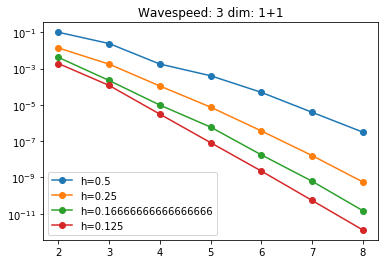

In [5]:
maxorder = 9
c = 3
t_start = 0
t_end = 0.4

fig = plt.figure()
ax = fig.gca()
for h in range(2,9,2):
    error = []
    initmesh = Mesh(SegMesh(h,0,1))
    for order in range(2,maxorder):
        wavefront = EvolveTentsMakeWavefront(order,initmesh,c,t_start)
        mat = EvolveTents(order,initmesh,c,t_end,wavefront,0)
        l2err = EvolveTentsPostProcess(order,initmesh,mat,EvolveTentsMakeWavefront(order,initmesh,c,t_end))
        #print("order: " + str(order) + " err: " + str(l2err))
        error.append(l2err)
    plt.semilogy(range(2,maxorder) , error, '-o', label="h="+str(1/h))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Wavespeed: ' + str(c) + " dim: " + str(initmesh.dim) + "+1")
plt.legend()
#plt.ylabel(label[yaxis])
#plt.xlabel(label[xaxis])
#plt.savefig("results/pvtv3_"+label[yaxis]+label[xaxis]+".png")
plt.show()

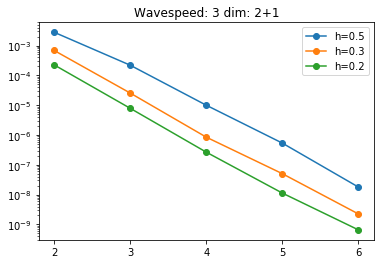

In [6]:
maxorder = 7
c = 3
t_start = 0
t_end = 0.1

fig = plt.figure()
ax = fig.gca()
for h in [0.5,0.3,0.2]:
    error = []
    initmesh = Mesh(unit_square.GenerateMesh(maxh=h))
    for order in range(2,maxorder):
        wavefront = EvolveTentsMakeWavefront(order,initmesh,c,t_start)
        mat = EvolveTents(order,initmesh,c,t_end,wavefront,0)
        l2err = EvolveTentsPostProcess(order,initmesh,mat,EvolveTentsMakeWavefront(order,initmesh,c,t_end))
        #print("order: " + str(order) + " err: " + str(l2err))
        error.append(l2err)
    plt.semilogy(range(2,maxorder) , error, '-o', label="h="+str(h))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Wavespeed: ' + str(c) + " dim: " + str(initmesh.dim) + "+1")
plt.legend()
#plt.ylabel(label[yaxis])
#plt.xlabel(label[xaxis])
#plt.savefig("results/pvtv3_"+label[yaxis]+label[xaxis]+".png")
plt.show()